# Математическая статистика
## Практическое задание 1

В данном задании рассматриваются различные способы генерации выборки из некоторых стандартных распределений, а так же рассматриваются некоторые свойства эмпирической функции распределения и ядерной оценки плотности.

**Правила:**

* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25%, то все задание оценивается в 0 баллов.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 13 баллов
* Задача 2 - 3 балла
* Задача 3 - 5 баллов
* Задача 4 - 3 балла
* Задача 5 - 2 балла
* Задача 6 - 1 балл
* Задача 7 - 3 балла

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Имеется симметричная монета. С ее помощью напишите функцию генерации выборки из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [6]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты
def uniform(size=1, precision=30):
    return (np.sum((2 * np.ones(precision)) ** np.flip(np.arange(-precision, 0, 1), 0)
               * np.array_split(coin(np.prod(np.asarray(size)) * precision),
                                np.prod(np.asarray(size))), axis=1)).reshape(size)

Для $U[0, 1]$ сгенерируйте выборку и постройте график плотности.

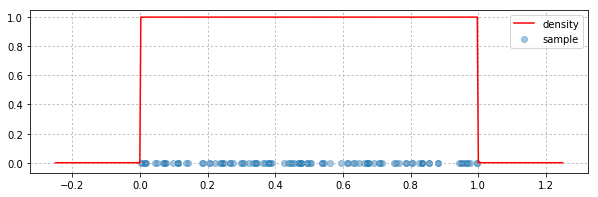

In [7]:
size = 100
grid = np.linspace(-0.25, 1.25, 500)

plt.figure(figsize=(10, 3))
plt.scatter(uniform(size, 50),
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.uniform.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняется выборка в зависимости от precision.

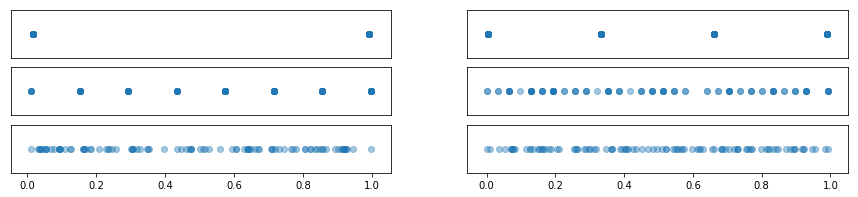

In [433]:
size = 100

plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(uniform(size, precision),
                np.zeros(size), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

Мы сумели получить равномерное распределение с помощью случайно величины, распределенной по Бернулли. В зависимости от значения precision нам удается лучше приблизить полученную функцию, заметим, что уже при precision = 30 получаем достаточно хорошее приближение.

*Часть 2.* Напишите функцию генерации выборки размера `size` (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [14]:
def normal(size=1, loc=0, scale=1, precision=30):
    return (np.sin(2 * np.pi * uniform(size, precision)) * np.sqrt(np.log(uniform(size, precision)) * -2))*scale + loc
normal(size=1, loc=0, scale=1, precision=30)

array([ 0.14064])

Для $\mathcal{N}(0, 1)$ сгенерируйте выборку и постройте график плотности этого распределения на отрезке $[-3, 3]$.

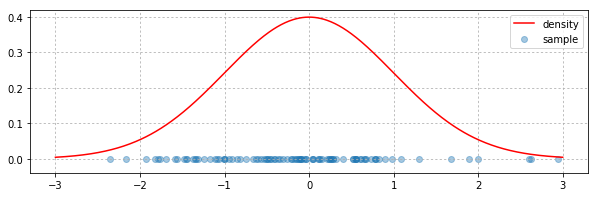

In [19]:
size = 100
grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(10, 3))
plt.scatter(normal(size, loc=0, scale=1, precision=30),
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.norm.pdf(grid),
         color='red', label='density')

plt.legend()
plt.grid(ls=':')
plt.show()

Пусть $P$ --- некоторое распределение на $(\mathbb{R}, \mathscr{B}(\mathbb{R}))$. Числа $a$ и $\sigma$ называются параметрами сдвига и масштаба соответственно для семейства распределений $\left\{P_{a,\sigma}\ \left|\ a \in \mathbb{R}, \sigma \in \mathbb{R}_+\right.\right\}$, где $P_{a,\sigma}(B) = P\left(\frac{B-a}{\sigma}\right)$ и $\frac{B-a}{\sigma} = \left\{\left. \frac{x-a}{\sigma}\ \right|\ x \in B \right\}$

**Вопрос:** Найдите плотность $P_{a,\sigma}$, если $P$ имеет плотность $p(x)$.

$p_{a,\sigma}(x)$ = $\frac{1}{\sigma} p(\frac{x - a}{\sigma})$

**Вопрос:** Пусть $P$ --- стандартное нормальное распределение. Выпишите параметрическое семейство распределений, параметризованное параметрами сдвига и масштаба по отношению к распределению $P$. Какая связь между параметрами и характеристиками распределения (например, математическое ожидание)?

Положим $\xi$ - случайная величина с распредлением $P$, $\xi_{a,\sigma}$ - случайная величина с распределением $P_{a,\sigma}$, тогда:  $E[\xi] = 0, \quad D[\xi] = 1$ $E[\xi_{a,\sigma}] = a, \quad D[\xi_{a,\sigma}] = \sigma^2$

Постройте на одном графике разными цветами плотности стандартного нормального распределения, а так же для параметров $a=3, \sigma=1$ и $a=0, \sigma=2$. Интеравл по оси икс $[-7, 7]$.

Ниже графика теми же цветами изобразите также точку $a$ и $3\sigma$-интервал, используя шаблон, приведенный ниже.

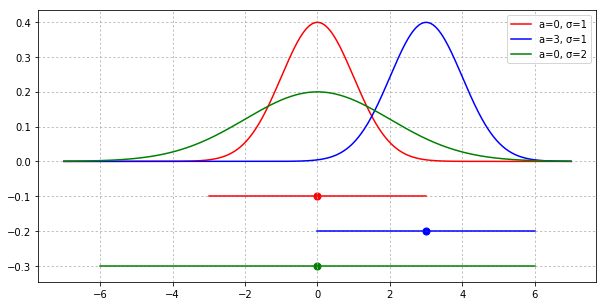

In [249]:
#Строим график плотности стандартного нормального распределения.
plt.figure(figsize=(10, 5))

grid = np.linspace(-7, 7, 500)

plt.plot(grid,
         sps.norm.pdf(grid, 0, 1),
         color='red', label='a=0, σ=1')
a = 0
sigma = 1
plt.plot([a - 3 * sigma, a + 3 * sigma], [-0.1, -0.1], color='red')
plt.scatter(a, -0.1, color='red', s=50)
#Строим график  плотности нормального распределения для параметров  a=3, σ=1
grid = np.linspace(-7, 7, 500)
plt.plot(grid,
         sps.norm.pdf(grid, 3, 1),
         color='blue', label='a=3, σ=1')
a = 3
sigma = 1
plt.scatter(a, -0.2, color='blue', s=50)
plt.plot([a - 3 * sigma, a + 3 * sigma], [-0.2, -0.2], color='blue')

#Строим график  плотности нормального распределения для параметров  a=0, σ=2
grid = np.linspace(-7, 7, 500)
plt.plot(grid,
         sps.norm.pdf(grid, 0, 2),
         color='green', label='a=0, σ=2')
a = 0
sigma = 2
plt.plot([a - 3 * sigma, a + 3 * sigma], [-0.3, -0.3], color='green')
plt.scatter(a, -0.3, color='green', s=50)
plt.grid(ls=':')
plt.legend()
plt.show()

**Вывод:**

После теоретической выкладки, мы на практике убедились в том, что параметр a отвечает за математическое ожидание, а параметр $\sigma$ за дисперсию.

*Часть 3.* Теперь напишите функцию генерации выборки из многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня из матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [138]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [157]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    D, R = eigh(cov_matrix)
    D = np.diagflat(D)
    return((R.T @ np.sqrt(D) @ (normal((size, cov_matrix.shape[0]), 0, 1, precision).T)) 
           + np.tile(mean, (size, 1)).T).T

Сгенерируйте выборку размера `size` из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите точки выборки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

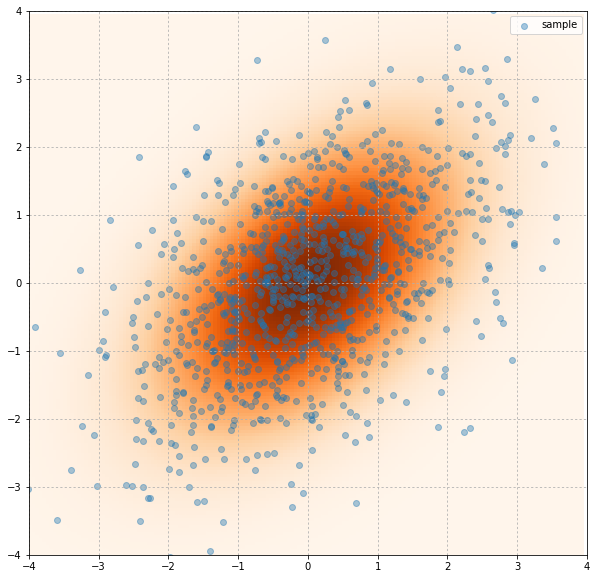

In [158]:
mean = np.array([0,0])
cov_matrix = np.array([[2, 1], [1, 2]])

size = 1000
sample = gauss(mean, cov_matrix, size)  # Генерация выборки

grid = np.mgrid[-4:4:0.05, -4:4:0.05]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]
pos[:, :, 1] = grid[1]
density = sps.multivariate_normal.pdf(pos, mean, cov_matrix)  # Вычисление плотности

plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**

Можно заметить, что mean - это аналог параметра сдвига из одномерного нормального распределения, а cov_matrix - это аналог параметра масштаба.

**Задача 2.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [161]:
def expon(size=1, lambd=1, precision=30):
    return np.log(uniform(size, precision)) * ( 1 / (-lambd))

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

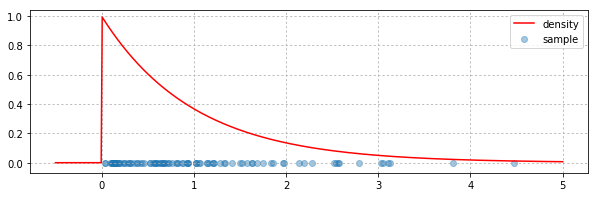

In [164]:
size = 100
grid = np.linspace(-0.5, 5, 500)

plt.figure(figsize=(10, 3))
plt.scatter(expon(size, lambd=1, precision=30),
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.expon.pdf(grid),
         color='red', label='density')

plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

Мы научились генерировать выборку из экспоненциального распределения через выборку из равномерного распределения.

**Задача 3.** Для каждого распределения постройте эмпирическую функцию распределения (ЭФР), гистограмму и ядерную оценку плотности. Сделать это помогут следующие функции.

In [84]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

*1. Бернуллиевское.*

Тут приведен пример построения ЭФР, просто запустите эту ячейку.

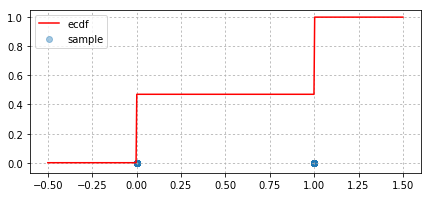

In [8]:
sample = coin(size=100)
ecdf = ECDF(sample)
grid = np.linspace(-0.5, 1.5, 500)

plt.figure(figsize=(7, 3))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Далее, чтобы не копировать несколько раз один и тот же код, напишем некоторую функцию.

В третьей функции нужно построить ядерную оценку плотности, о которой будет рассказано на лекциях. В частности, формула была на презентации на первой лекции. Пример построения можно посмотреть тут http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.html

In [440]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        plt.scatter(sample[0:size], np.zeros(size), 
                    alpha=0.4, label='sample')
        
        if cdf is not None:
            plt.plot(grid, 
                     cdf(grid), 
                     color='green', alpha=0.3, lw=2, label='true cdf')
        
        ecdf = ECDF(sample[0:size])
        plt.plot(grid, 
                 ecdf(grid), 
                 color='red', label='ecdf')
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(sample[0:size], 
                 20,
                 range=(grid.min(), grid.max()), 
                 normed=True)
        
        if pdf is not None:
            plt.plot(grid, 
                     pdf(grid), 
                     color='green', alpha=0.3, lw=2)
    plt.show()
    

def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''
        
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample[:size])
        kernel_density.fit()
        
        plt.scatter(sample[0:size], np.zeros(size), 
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid,
                     pdf(grid),
                     color='green', alpha=0.3, lw=2, label='true pdf')
        #<Значение ядерной оценки плотности (по первым size точек из sample) 
                 #в точках grid (используйте evaluate)>
        plt.plot(grid,
                 kernel_density.evaluate(grid),
                 color='red', label='kde')
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()



При использовании KDEUnivariate могут возникать разные проблемы. Можно попробовать их решить следующими способами:

**1.** В режиме суперюзера в файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py` замените строку 20 на

`y = X[:int(m/2+1)] + np.r_[0,X[int(m/2+1):],0]*1j`

В файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py` замените строку 327 на

`nobs = len(X) # after trim`

**2.** Попробуйте скачать с гитхаба https://github.com/statsmodels/statsmodels/, установить руками. При этом должен быть установлен cython.

Можно также воспользоваться другой реализацией http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

-------

Теперь примените реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и $Exp(1)$. Графики (ф.р., плотностей) стройте на интервалах $(-0.2, 1.2)$, $(-3, 3)$ и $(-0.5, 5)$ соответственно.

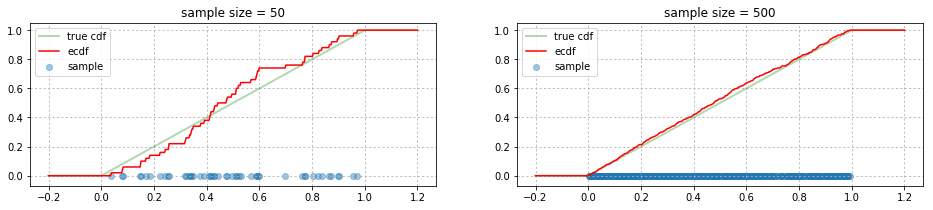

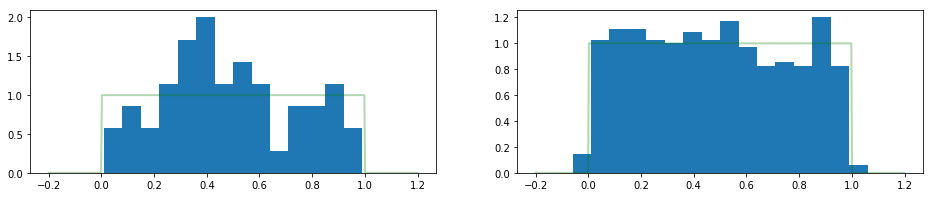

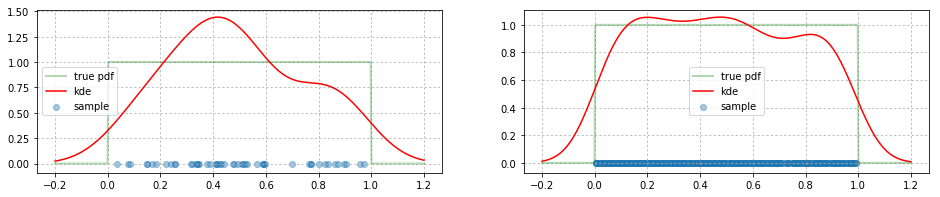

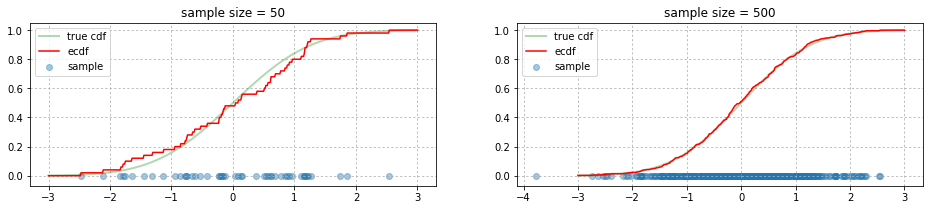

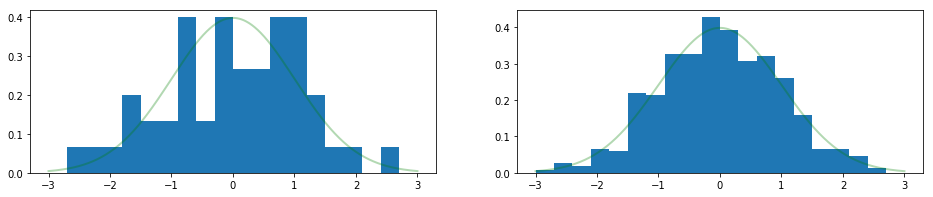

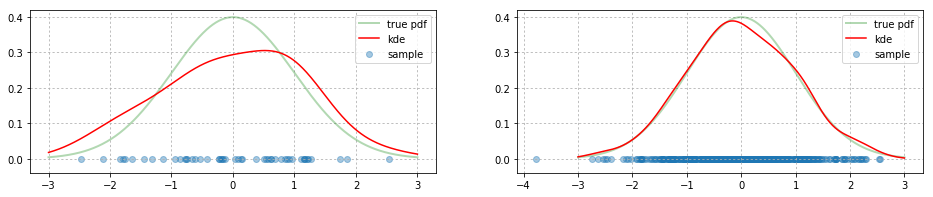

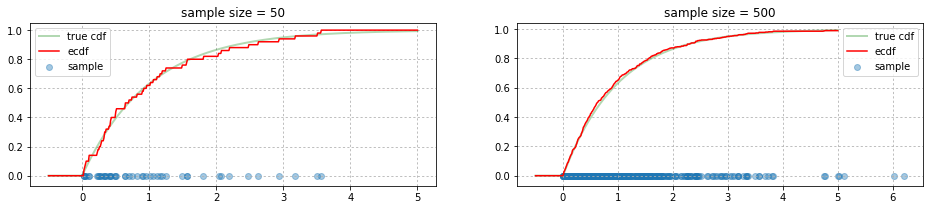

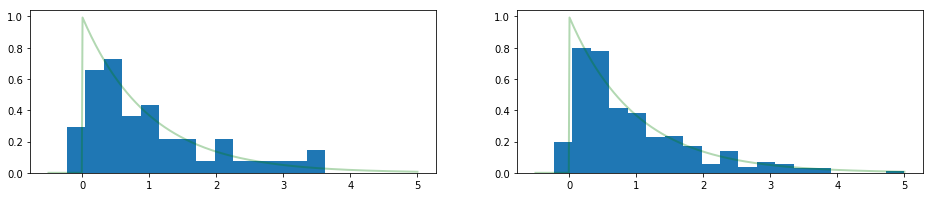

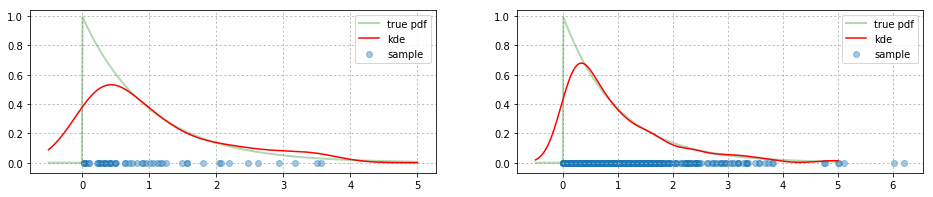

In [438]:
#Применим функции к равномерному распределению.
size = 500
sample = uniform(size=500, precision=50)
grid = np.linspace(-0.2, 1.2, 500)
draw_ecdf(sample, grid, sps.uniform.cdf)
draw_hist(sample, grid, sps.uniform.pdf)
draw_pdf(sample, grid, sps.uniform.pdf)

#Применим функции к стандартному нормальному распределению.
size = 500
sample = normal(size, loc=0, scale=1, precision=50)
grid = np.linspace(-3, 3, 500)
draw_ecdf(sample, grid, sps.norm.cdf)
draw_hist(sample, grid, sps.norm.pdf)
draw_pdf(sample, grid, sps.norm.pdf)

#Применим функции к экспоненциальному распределению.
size = 500
sample = expon(size, lambd=1, precision=30)
grid = np.linspace(-0.5, 5, 500)
draw_ecdf(sample, grid, sps.expon.cdf)
draw_hist(sample, grid, sps.expon.pdf)
draw_pdf(sample, grid, sps.expon.pdf)

**Вывод:**

Увеличение выборки в 10 раз (с 50 до 500) значительно улучшает как построенную ЭФР, так и ядерную оценку плотности и гистограмму.

**Задача 4.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$
Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод.

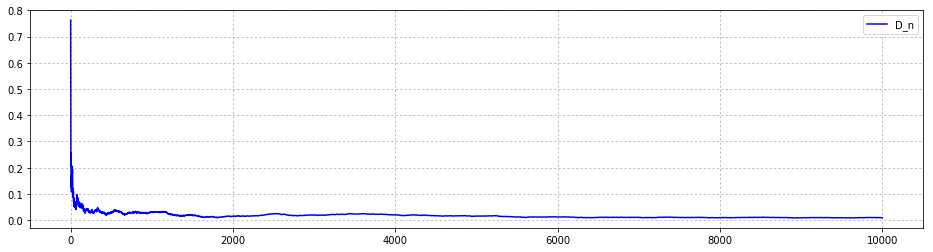

In [434]:
size = 10000
sample = normal(size, loc=0, scale=1, precision=50)
grid = np.linspace(-1, 1, 10000)
d = np.zeros(10000)
for i in range(1, 10001):
    ecdf = ECDF(sample[0:i])
    d[i-1] = np.max(ecdf(grid) - sps.norm.cdf(grid))

#Построим график
plt.figure(figsize=(16,4))
plt.plot(np.arange(10000), d, color='blue', label='D_n')
plt.legend()
plt.grid(ls=':')
plt.show()

График зависимости $D_n$ от $n$, построенный нами, подтверждает теорему Гливенко - Канетлии, согласно которой $D_n \overset{п.н.}{\longrightarrow} 0$


**Задача 5.** Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

 Не забудьте сделать вывод.

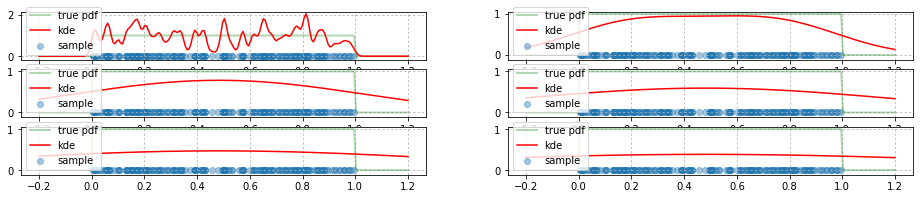

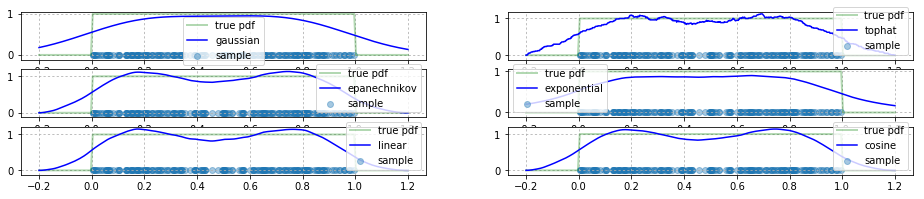

In [439]:
sample = uniform(200, 50)
grid = np.linspace(-0.2, 1.2, 200)
def draw_pdf_second(sample, grid, pdf=None):
        
    plt.figure(figsize=(16, 3))
    for i, biweight in enumerate([0.01, 0.2, 0.4, 0.6, 0.8, 1]):
        plt.subplot(3, 2, i + 1)
        kernel_density = KDEUnivariate(sample)
        kernel_density.fit(bw=biweight)
        
        plt.scatter(sample, np.zeros(len(sample)), 
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid,
                     pdf(grid),
                     color='green', alpha=0.3, lw=2, label='true pdf')
        plt.plot(grid,
                 kernel_density.evaluate(grid),
                 color='red', label='kde')
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()
    
from sklearn.neighbors import KernelDensity    

def draw_pdf_third(sample, grid, pdf=None):
        
    plt.figure(figsize=(16, 3))
    for i, kernels in enumerate(['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']):
        plt.subplot(3, 2, i + 1)
        kernel_density = KernelDensity(kernel=kernels, bandwidth=0.2)
        kernel_density.fit(sample.reshape(-1,1))
        
        plt.scatter(sample, np.zeros(len(sample)), 
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid, pdf(grid),
                     color='green', alpha=0.3, lw=2, label='true pdf')
        
        X_plot = np.linspace(-0.2, 1.2, 1000).reshape(-1, 1)
        plt.plot(X_plot[:, 0], np.exp(kernel_density.score_samples(X_plot)), color='blue', label=kernels)
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()
    
draw_pdf_second(sample, grid, sps.uniform.pdf)
draw_pdf_third(sample, grid, sps.uniform.pdf)

Как следует из графиков к выбору ширины гауссовского ядра стоит подходит тщательно, так как хорошего приближения добится непросто: при малых значениях ширины  вклад нескольких точек достаточно велик, а при больших значениях все вырождается в линию. 

**Задача 6.** В файле `countries.csv` дан список стран и территорий с указанием их площади. Нанести значения площади на график и постройте эмпирическую функцию распределения и ядерную оценку плотности. Поскольку некоторые страны слишком большие, ограничьте график по оси икс.  Не забудьте сделать вывод.

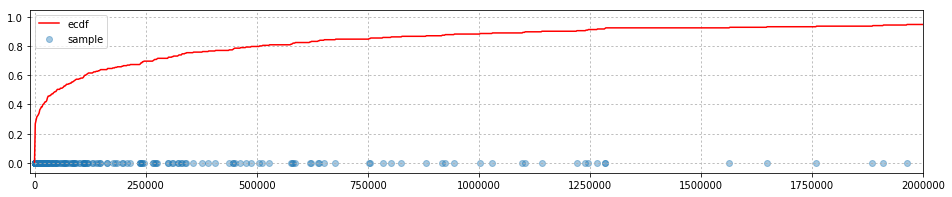

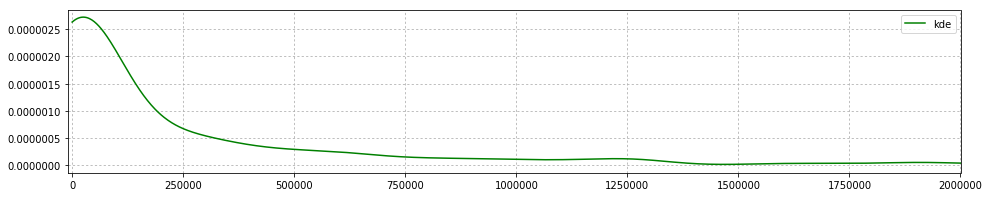

In [296]:
#прочтем countries.csv 
import csv
areas = np.zeros(0)
np.append(areas, [12])
np.set_printoptions(precision=3)
with open('countries.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        areas = np.append((float(row[0].split("\t")[2])) , areas)
        
areas = areas[::-1]
#Нанесем значения на график, построим ЭФР и ядерную оценку плотности.
size = 100
plt.figure(figsize=(16, 3))
plt.scatter(areas,
            np.zeros(len(areas)), alpha=0.4, label='sample')

grid = np.linspace(areas.min(), areas.max(), 10000)
ecdf = ECDF(areas)

plt.plot(grid, 
        ecdf(grid), 
        color='red', label='ecdf')
plt.xlim([-10e3, 2e6])
plt.grid(ls=':')
plt.legend()

plt.figure(figsize=(16, 3))
kernel_density = KDEUnivariate(areas)
kernel_density.fit()
plt.plot(grid,
        kernel_density.evaluate(grid),
         color='green', label='kde')
plt.grid(ls=':')
plt.xlim([-10e3, 2e6])
plt.legend()


Легко видеть, что площади стран распределены экспоненциально.

**Задача 7.** Проведите небольшое исследование. Выберите случайных $n$ человек в социальной сети. Вы можете выбирать их случайно из всех зарегистрированных в этой социальной сети, либо по какому-то *одному* критерию (укажите его). Составьте выборку $X_1, ..., X_n$, где $X_i$ --- количество друзей у $i$-го человека. Постройте по этой выборке эмпирическую функцию распределения. Можете ли вы сказать, какому закону подчиняется распределение количества друзей?

Выборка должна быть из не менее 30 человек, ограничений сверху нет. Вы можете также написать программу, которая будет автоматически собирать данные.  Не забудьте сделать вывод.

In [407]:
import vk
import vk_api

login, password = 'login', 'password'
vk_session = vk_api.VkApi(login, password)

try:
    vk_session.authorization()
except vk_api.AuthorizationError as error_msg:
    print(error_msg)


vk = vk_session.get_api()

values=[1]
friends = {}
with vk_api.VkRequestsPool(vk_session) as pool:
        friends = pool.method_one_param(
            'friends.get',  
            key='user_id',  
            values = values,
        )

friends_ids = friends.result[1]['items']

friends = {}

with vk_api.VkRequestsPool(vk_session) as pool:
        friends = pool.method_one_param(
            'friends.get',  
            key='user_id',  
            values = friends_ids,
        )
sample = np.zeros(len(friends_ids))
for i, each in enumerate(friends_ids):
        if each in friends.result.keys():
            sample[i] = friends.result[each]['count']

        
print(sample)

[  3.300e+01   8.890e+02   2.950e+02   2.300e+02   1.410e+02   7.900e+01
   4.660e+02   3.290e+02   3.710e+02   1.279e+03   4.050e+02   2.000e+00
   2.120e+02   5.580e+02   2.410e+02   1.400e+02   3.020e+02   1.140e+02
   1.530e+02   1.342e+03   1.970e+02   6.580e+02   5.140e+02   5.060e+02
   2.140e+02   1.180e+02   4.000e+02   2.260e+02   4.360e+02   1.520e+02
   7.210e+02   3.200e+02   8.800e+01   1.990e+02   3.530e+02   4.090e+02
   6.360e+02   7.680e+02   3.290e+02   4.670e+02   1.600e+02   1.235e+03
   4.530e+02   2.620e+02   4.300e+02   6.980e+02   3.290e+02   3.170e+02
   3.680e+02   1.580e+02   2.900e+01   6.130e+02   4.570e+02   1.420e+02
   6.610e+02   1.870e+03   7.390e+02   2.100e+02   3.240e+02   3.880e+02
   2.640e+02   2.540e+02   3.240e+02   7.350e+02   3.350e+02   6.510e+02
   2.680e+02   3.740e+02   4.330e+02   1.480e+02   7.572e+03   1.104e+03
   7.200e+01   6.690e+02   1.580e+03   3.690e+02   4.150e+02   1.280e+02
   1.960e+02   3.110e+02   3.670e+02   1.530e+02   

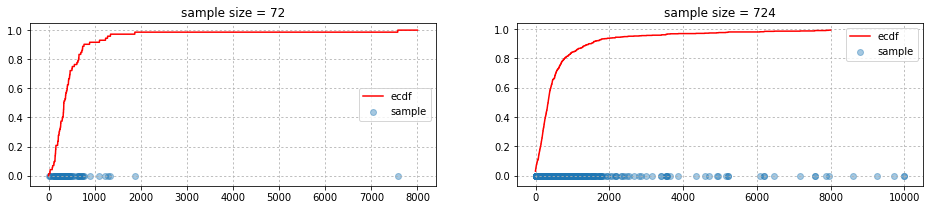

In [429]:
draw_ecdf(sample, np.linspace(0, 8000, 10000))

Мы выбрали 724 человека из социальной сети vk, являющихся друзьями ее создателя,  и посчитали количество их друзей. На построенных графиках видно, что распределение количества друзей экспоненциально.